A neural network model to classify images of clothing, like sneakers and shirts

##Importing important libraries

In [1]:
#Tensorflow and tf.keras
import tensorflow as tf

# other libraries
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow:" , tf.__version__)

TensorFlow: 2.18.0


##Importing the Fashion MNIST dataset

This dataset contains 70,000 grayscale images in 10 categories. 60,000 images are used to train the network and 10, 000 images to evaluate how accurately the network learned to classify the images.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Loading the dataset returns four NumPy arrays:


*   The `train_images` and `train_labels` arrays are the training set-the data model uses to learn
*   The model is tested against the test set, the `test_images`, and `test_labels` arrays

The images are 28*28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9 which corresponds to the *class* of clothing the image represents. E.g. 0 - T-shirt

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here for use in plotting.


In [3]:
class_names = ['T-shirt/Top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Exploring the data

This means that our training set contains 60000 images, with each image represented as 28 * 28 pixels

In [9]:
train_images.shape


(60000, 28, 28)

There are 60,000 labels in the training set

In [10]:
len(train_labels)


60000

Each label is an integer between 0 and 9:

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
# Checking the shape of the test set
test_images.shape

(10000, 28, 28)

In [13]:
# checking the number of test labels
len(test_labels)

10000

##Preprocessing the data
The data must be preprocessed before training the network

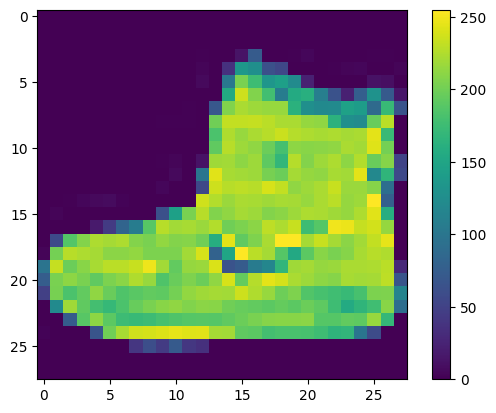

In [16]:
# checking the first image in the training set
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scaling these values to a range of 0 to 1 before feeding them to the neural network

In [17]:
# Training set and testing set must be processed in the same way
# Dividing these values by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

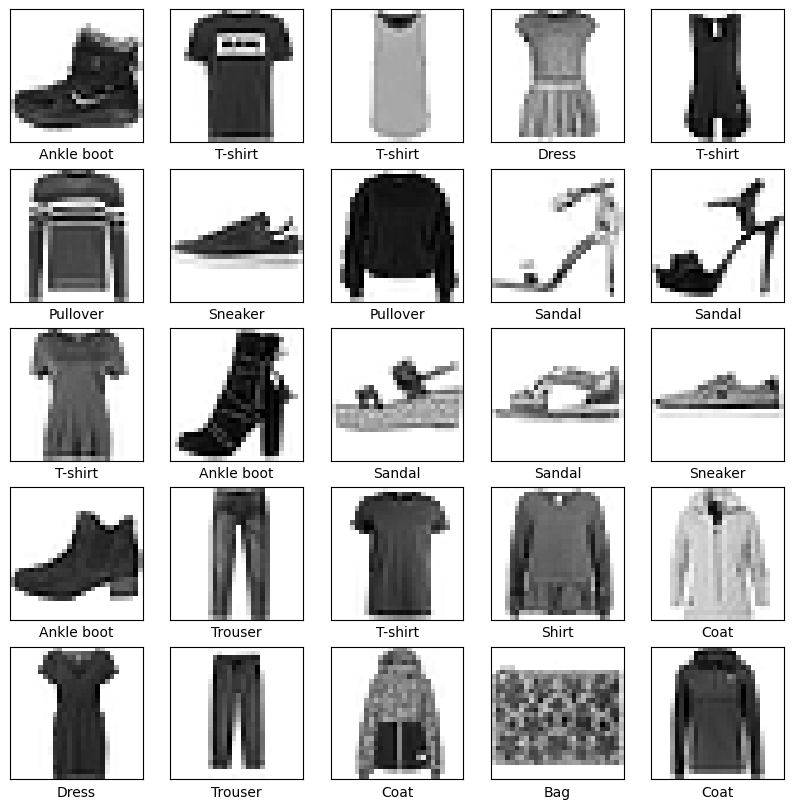

In [26]:
# Diaplaying the first 25 images from the training set and displaying the class name below each image to check if the data is in the correct format
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


##Building the Model

In [28]:
# setting up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Training the model

**Note:** The model reaches an accuracy of 0.92 (or 92%) on the training data

In [29]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7834 - loss: 0.6337
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8599 - loss: 0.3891
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8786 - loss: 0.3337
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8856 - loss: 0.3101
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8888 - loss: 0.2971
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8959 - loss: 0.2816
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9024 - loss: 0.2636
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.2646
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9088 - loss: 0.2418
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9104 - loss: 0.2404
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9144 - loss: 0.2306
Epoch 12/15
1875/1875 ━━━

##Evaluating the model accuracy

In [30]:
# Comparing how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8861 - loss: 0.3343

Test accuracy: 0.8860999941825867


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between the training dataset and test dataset shows *overfitting*

An overfitted model "memorizes" the noise and details details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

In [35]:
# making predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
# Looking at the first prediction
predictions[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.7712749e-08, 9.8009383e-13, 2.5928410e-14, 1.9988191e-16,
       8.7828328e-11, 4.2229531e-05, 5.3306735e-08, 1.1369241e-03,
       6.2392385e-09, 9.9882072e-01], dtype=float32)

In [37]:
# checking which label has the highest confidence value
np.argmax(predictions[0])

np.int64(9)

The model is confident that this image is an ankle boot or `class_names[9]`.

In [38]:
# Examining the test label shows that this classification is correct
test_labels[0]

np.uint8(9)

In [43]:
# defining functions to graph the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show(close=None, block=None)>

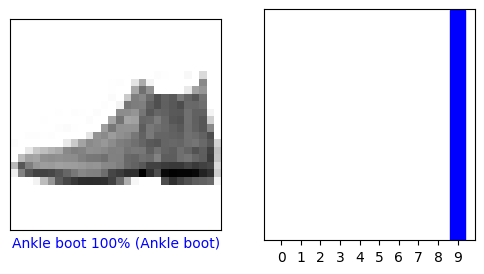

In [44]:
# verifying predictions
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

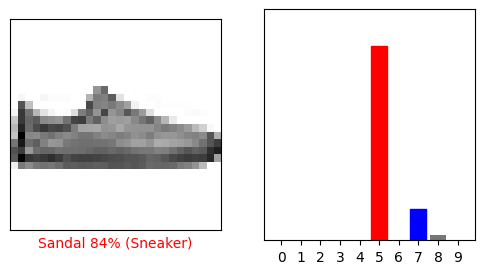

In [45]:
# verifying predictions
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show

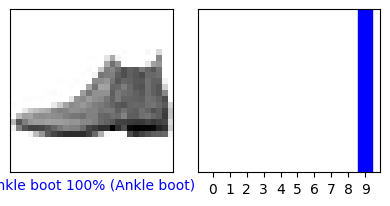

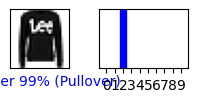

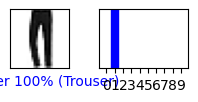

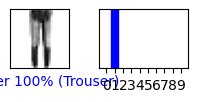

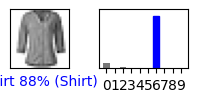

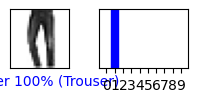

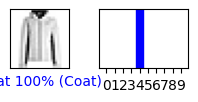

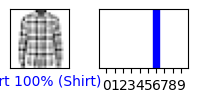

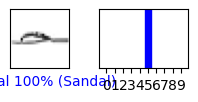

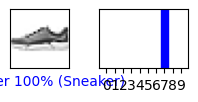

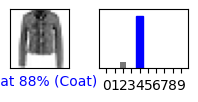

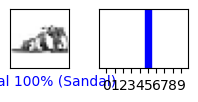

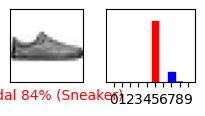

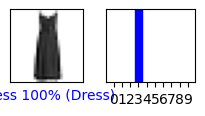

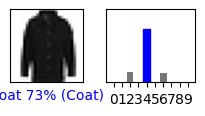

In [47]:
# plot the first X test_images, their predicted labels, and the true labels.
# Incorrect color predictions in blue and incorrect color predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
  plt.tight_layout()
  plt.show()


##Using the Trained Model to make a prediction about a single image

In [48]:
# Choosing a random image from the test dataset
img = test_images[56]
print(img.shape)

(28, 28)


In [49]:
# Adding the image to a batch where it is the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [50]:
# predicting the label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[1.3217588e-07 9.2315110e-13 4.7420318e-10 5.0196219e-13 5.2644117e-10
  2.3999611e-10 6.0533423e-09 3.3973260e-10 9.9999988e-01 2.5698610e-14]]


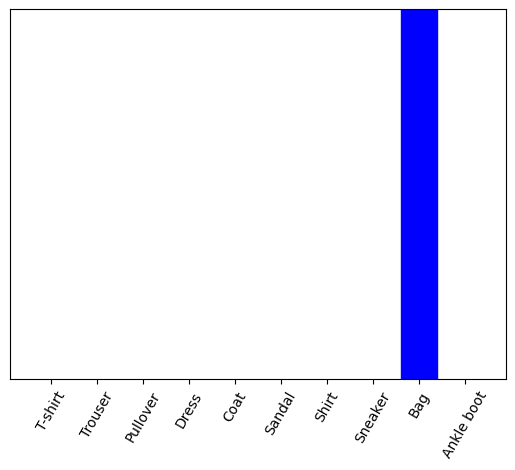

In [52]:
plot_value_array(56, predictions_single[0], test_labels)
_= plt.xticks(range(10), class_names, rotation=60)
plt.show()

In [54]:
# Grabbing the predictions for our (only) batched image
np.argmax(predictions_single[0])

np.int64(8)

The model predicts a label as expected